<a href="https://colab.research.google.com/github/ajinkyajumde/customer-prediction/blob/main/Final_Customer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data='/content/drive/MyDrive/Almabetter projects/Customer prediction/train_wn75k28.csv'
test_dataset=pd.read_csv(data)

In [5]:
test_dataset.head(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [6]:
test_dataset.tail(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39160,39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
test_dataset.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [8]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [9]:
test_dataset=test_dataset.drop(columns=['signup_date','id','created_at'],axis=1)

In [10]:
test_dataset=test_dataset.dropna()

In [11]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18250 entries, 0 to 39159
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        18250 non-null  int64  
 1   campaign_var_2        18250 non-null  int64  
 2   products_purchased    18250 non-null  float64
 3   user_activity_var_1   18250 non-null  int64  
 4   user_activity_var_2   18250 non-null  int64  
 5   user_activity_var_3   18250 non-null  int64  
 6   user_activity_var_4   18250 non-null  int64  
 7   user_activity_var_5   18250 non-null  int64  
 8   user_activity_var_6   18250 non-null  int64  
 9   user_activity_var_7   18250 non-null  int64  
 10  user_activity_var_8   18250 non-null  int64  
 11  user_activity_var_9   18250 non-null  int64  
 12  user_activity_var_10  18250 non-null  int64  
 13  user_activity_var_11  18250 non-null  int64  
 14  user_activity_var_12  18250 non-null  int64  
 15  buy                

In [12]:
test_dataset['buy'].value_counts()

0    17297
1      953
Name: buy, dtype: int64

In [13]:
for i in list(test_dataset.describe()):
  print(f'The Value count for {i} is','\n')
  print(test_dataset[i].value_counts())

The Value count for campaign_var_1 is 

4     2035
5     2016
3     1935
2     1918
6     1900
7     1676
8     1523
9     1188
10     980
1      975
11     718
12     549
13     399
14     240
15     146
16      52
Name: campaign_var_1, dtype: int64
The Value count for campaign_var_2 is 

6     2688
5     2567
7     2488
8     2062
4     2050
3     1539
9     1531
2     1013
10     952
11     541
1      341
12     286
13     143
14      46
15       3
Name: campaign_var_2, dtype: int64
The Value count for products_purchased is 

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64
The Value count for user_activity_var_1 is 

0    11342
1     6765
2      143
Name: user_activity_var_1, dtype: int64
The Value count for user_activity_var_2 is 

0    18126
1      124
Name: user_activity_var_2, dtype: int64
The Value count for user_activity_var_3 is 

0    16274
1     1976
Name: user_activity_var_3, dtype: int64
The Value count for user_activity_var_4 is 

0

In [14]:
test_dataset=test_dataset.drop(columns=['user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_9','user_activity_var_10','user_activity_var_12','products_purchased'],axis=1)

In [15]:
buyers=test_dataset[test_dataset['buy']==1]
non_buyers=test_dataset[test_dataset['buy']==0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

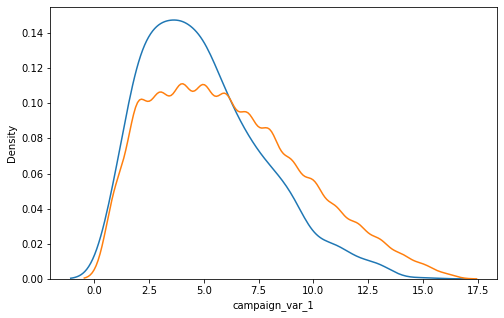

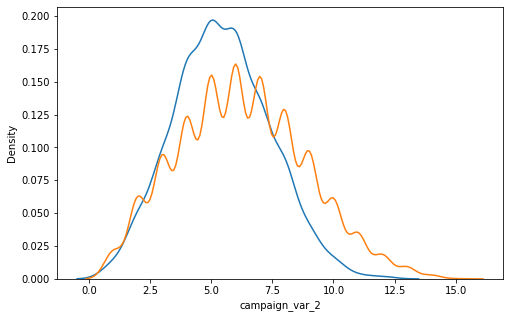

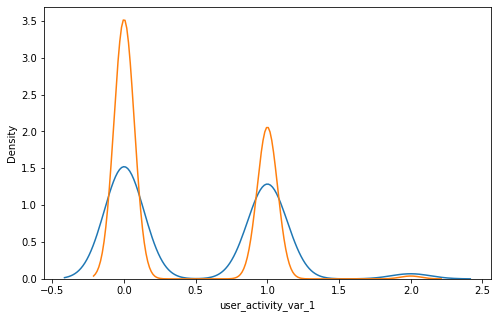

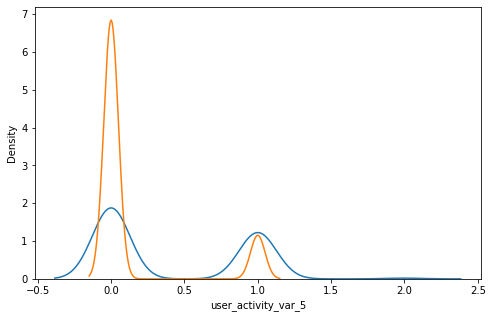

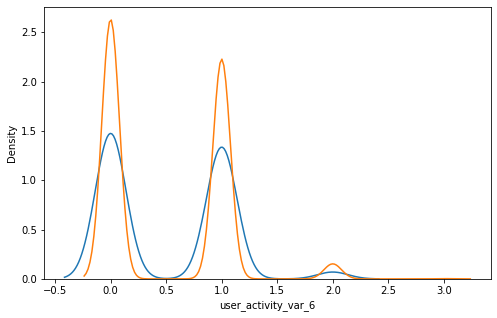

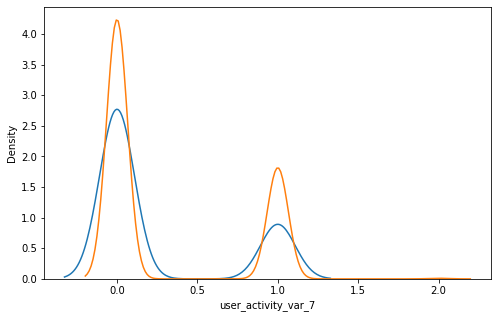

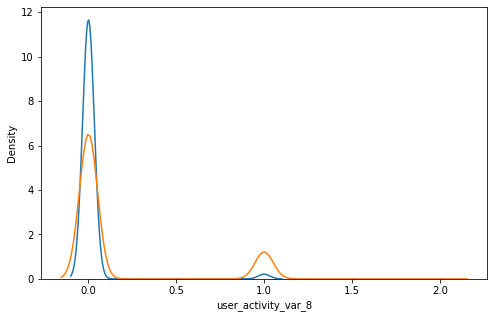

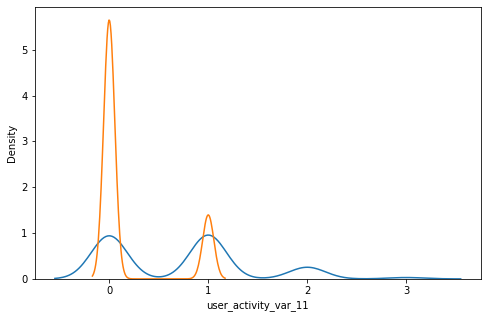

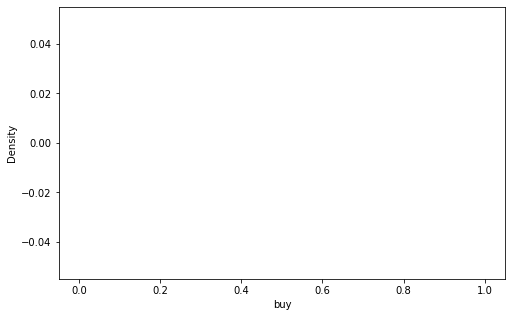

In [16]:
# Distribution plot
for i in list(test_dataset.describe()):
   plt.figure(figsize=(8,5))
   ax = sns.distplot(buyers[i],label='buy',hist=False)
   ax = sns.distplot(non_buyers[i],label='didnt buy',hist=False)
   ax.set(xlabel=i)
plt.show()

In [17]:
lst=list(test_dataset.columns)
lst

['campaign_var_1',
 'campaign_var_2',
 'user_activity_var_1',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_11',
 'buy']

In [18]:
test_dataset=pd.get_dummies(test_dataset, columns=['campaign_var_1',
 'campaign_var_2',
 'user_activity_var_1',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_11'], prefix=['campaign_var_1',
 'campaign_var_2',
 'user_activity_var_1',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_11'])

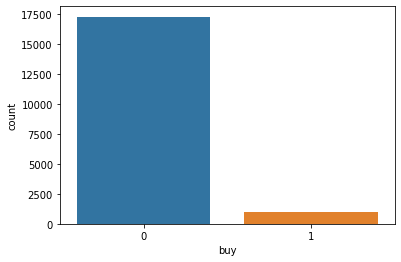

In [19]:
sns.countplot(x=test_dataset['buy'])

In [20]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [21]:
 # Data for all the independent variables
X = test_dataset.drop(labels='buy',axis=1)

 # Data for the dependent variable
Y = test_dataset['buy']

In [22]:
X.shape, Y.shape

((18250, 51), (18250,))

In [23]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [24]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
Xtrain=X_train
cv = StratifiedKFold(n_splits=5)
X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

In [25]:
print('Before SMOTE oversampling X_train shape=',Xtrain.shape)
print('After SMOTE oversampling X_train shape=',X_train.shape)

Before SMOTE oversampling X_train shape= (14600, 51)
After SMOTE oversampling X_train shape= (27678, 51)


In [26]:
Y_train.value_counts()

0    13839
1    13839
Name: buy, dtype: int64

In [27]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(27678, 51) (27678,)
(3650, 51) (3650,)


In [28]:
# Importing XGBoost
from xgboost import XGBClassifier

In [29]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [30]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.01,0.1,0.5,1,10,50], 
             'subsample': [0.3, 0.6, 0.9,1]}          


# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train) 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=XGBClassifier(n_estimators=200),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 10, 50],
                         'subsample': [0.3, 0.6, 0.9, 1]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.604992,0.040177,0.057381,0.002755,0.01,0.3,"{'learning_rate': 0.01, 'subsample': 0.3}",0.872850,0.895536,0.891615,0.886667,0.009900,13,0.892461,0.885176,0.885622,0.887753,0.003334
1,6.437489,0.004482,0.054324,0.000519,0.01,0.6,"{'learning_rate': 0.01, 'subsample': 0.6}",0.871326,0.893442,0.890342,0.885037,0.009777,14,0.891284,0.882680,0.884979,0.886314,0.003637
2,5.118382,0.003118,0.053682,0.002279,0.01,0.9,"{'learning_rate': 0.01, 'subsample': 0.9}",0.869064,0.889368,0.887477,0.881970,0.009158,15,0.888750,0.878845,0.881188,0.882928,0.004227
3,4.567325,0.006062,0.052011,0.002524,0.01,1,"{'learning_rate': 0.01, 'subsample': 1}",0.868351,0.888163,0.888324,0.881613,0.009378,16,0.888332,0.877416,0.882392,0.882713,0.004463
4,5.359682,0.010815,0.041370,0.000675,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.959516,0.987392,0.986164,0.977691,0.012861,9,0.988131,0.973973,0.974894,0.978999,0.006468
5,6.479274,0.293150,0.040940,0.000627,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.958608,0.987304,0.986626,0.977513,0.013370,10,0.987640,0.973819,0.974757,0.978739,0.006306
6,4.987235,0.008792,0.041129,0.000343,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.957816,0.987255,0.986158,0.977077,0.013626,11,0.987021,0.973695,0.974085,0.978267,0.006192
7,5.022686,0.557759,0.040741,0.000374,0.1,1,"{'learning_rate': 0.1, 'subsample': 1}",0.958093,0.987091,0.985850,0.977011,0.013387,12,0.987156,0.973581,0.974045,0.978261,0.006293
8,5.779105,0.305166,0.054034,0.009041,0.5,0.3,"{'learning_rate': 0.5, 'subsample': 0.3}",0.968155,0.995341,0.994456,0.985984,0.012612,4,0.996460,0.984909,0.985322,0.988897,0.005351
9,6.328059,0.020840,0.043958,0.000391,0.5,0.6,"{'learning_rate': 0.5, 'subsample': 0.6}",0.966573,0.995800,0.995134,0.985836,0.013623,5,0.996191,0.985449,0.985957,0.989199,0.004949


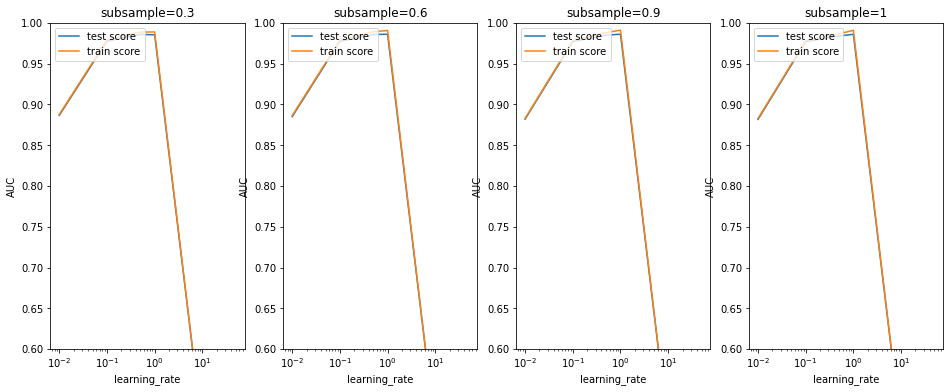

In [32]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.01,0.1,0.5,1,10], 
             'subsample': [0.3, 0.6, 0.9,1]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [33]:
model_cv.best_params_

{'learning_rate': 1, 'subsample': 0.9}

In [34]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 1,
           
          
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, Y_train)

XGBClassifier(params={'learning_rate': 1, 'objective': 'binary:logistic',
                      'subsample': 0.6})

In [35]:
# Predictions on the train set
Y_train_pred = xgb_imb_model.predict(X_train)

In [36]:
# Confusion matrix
confusion = confusion_matrix(Y_train, Y_train_pred)
print(confusion)


[[13459   380]
 [ 1814 12025]]


In [37]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [38]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.9207312667100224
Sensitivity:- 0.868921164824048
Specificity:- 0.9725413685959968
F1-Score:- 0.9163999390336839


In [39]:
Y_test_pred = xgb_imb_model.predict(X_test)

In [40]:
# Confusion matrix
confusion = confusion_matrix(Y_test, Y_test_pred)
print(confusion)


[[3355  103]
 [ 134   58]]


In [41]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [42]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.9207312667100224
Sensitivity:- 0.3020833333333333
Specificity:- 0.970213996529786
F1-Score:- 0.9163999390336839


## LOGISTIC REGRESSION MODEL WITH K FOLD CROSS VALIDATION

In [43]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [44]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [45]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [46]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001,0.05,0.01, 0.1, 1, 10, 100,150,250]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.05, 0.01, 0.1, 1, 10, 100, 150, 250]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [47]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.228491,0.005464,0.007728,0.000145,0.001,{'C': 0.001},0.973034,0.974752,0.979001,0.975623,...,0.975843,0.002002,9,0.976814,0.976279,0.975357,0.976181,0.975554,0.976037,0.000525
1,0.365588,0.011963,0.008099,0.000340,0.05,{'C': 0.05},0.977673,0.978560,0.981957,0.979087,...,0.979542,0.001503,7,0.980298,0.980028,0.979369,0.980112,0.979697,0.979901,0.000329
2,0.300456,0.012455,0.007823,0.000247,0.01,{'C': 0.01},0.975344,0.976452,0.980455,0.977215,...,0.977606,0.001769,8,0.978368,0.978108,0.977312,0.978148,0.977551,0.977897,0.000398
3,0.381787,0.027159,0.007842,0.000128,0.1,{'C': 0.1},0.978271,0.979220,0.982451,0.979680,...,0.980113,0.001451,6,0.980912,0.980633,0.979993,0.980752,0.980373,0.980533,0.000322
4,0.537270,0.014880,0.007836,0.000188,1,{'C': 1},0.979798,0.980692,0.983619,0.980981,...,0.981362,0.001285,5,0.982224,0.981956,0.981277,0.981996,0.981829,0.981856,0.000317
5,0.561151,0.018341,0.007753,0.000233,10,{'C': 10},0.980306,0.980996,0.983868,0.981505,...,0.981713,0.001201,4,0.982601,0.982333,0.981661,0.982307,0.982182,0.982217,0.000309
6,0.559678,0.024077,0.007997,0.000331,100,{'C': 100},0.980349,0.981015,0.983876,0.981564,...,0.981779,0.001197,1,0.982639,0.982404,0.981713,0.982390,0.982241,0.982278,0.000310
7,0.557335,0.017369,0.008586,0.001789,150,{'C': 150},0.980340,0.980973,0.983898,0.981509,...,0.981762,0.001215,3,0.982646,0.982409,0.981715,0.982399,0.982233,0.982280,0.000312
8,0.561216,0.017610,0.007668,0.000145,250,{'C': 250},0.980345,0.980917,0.983911,0.981584,...,0.981765,0.001222,2,0.982645,0.982409,0.981697,0.982405,0.982240,0.982279,0.000318


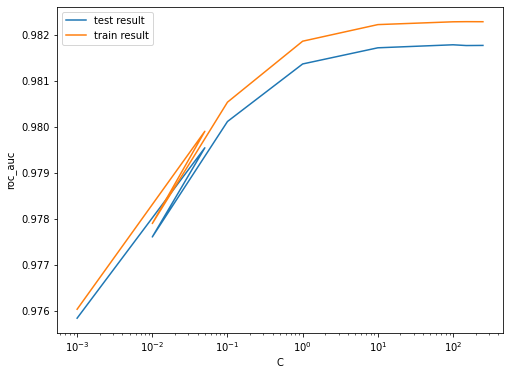

In [48]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [49]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.981778565114146 at C = 100


In [50]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=150)

In [51]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [52]:
# Predictions on the train set
Y_train_pred = logistic_imb_model.predict(X_train)

In [53]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train_pred)
print(confusion)

[[13554   285]
 [ 1416 12423]]


In [54]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [55]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.9385432473444613
Sensitivity:- 0.897680468241925
Specificity:- 0.9794060264469976
F1-Score:- 0.9359249632726863


In [ ]:
# Predictions on the train set
Y_test_pred = logistic_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

[[3440   18]
 [ 184    8]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.9446575342465754
Sensitivity:- 0.041666666666666664
Specificity:- 0.9947946790052054
F1-Score:- 0.07339449541284403


## **KNN MODEL**

In [56]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

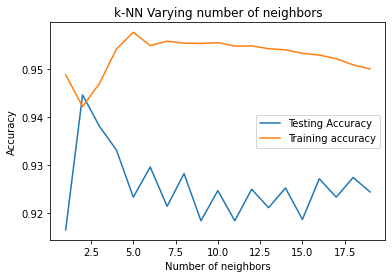

In [57]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [58]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [59]:
# Fit the model
kn_model=knn.fit(X_train,Y_train)

In [60]:
# Predictions on the train set
Y_train_pred = kn_model.predict(X_train)

In [61]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train_pred)
print(confusion)

[[13813    26]
 [ 1573 12266]]


In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.9422284847171039
Sensitivity:- 0.8863357178986921
Specificity:- 0.9981212515355156
F1-Score:- 0.9388083119666296


In [64]:
# Predictions on the train set
Y_test_pred = kn_model.predict(X_test)

In [65]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

[[3440   18]
 [ 184    8]]


In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.9446575342465754
Sensitivity:- 0.041666666666666664
Specificity:- 0.9947946790052054
F1-Score:- 0.07339449541284403
